<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 18px; text-align: center;">
  <div style="display: inline-block; border: 2px solid red; color: red; padding: 5px 10px; border-radius: 20px; font-weight: bold; font-size: 32px;">
    Nintendo Top Title Sales - Exploratory Data Analysis
  </div><br>
  <h4 style="margin: 5px 0 0 0; line-height: 1.2; font-size: 16px;">Christopher Heimbuch - <a href="https://github.com/chrisheimbuch">https://github.com/chrisheimbuch</a></h4>
  <h4 style="margin: 0; line-height: 1.2; font-size: 16px;">Dataset: <a href="https://www.kaggle.com/datasets/thedevastator/global-video-game-sales">https://www.kaggle.com/datasets/thedevastator/global-video-game-sales</a></h4>
</div>

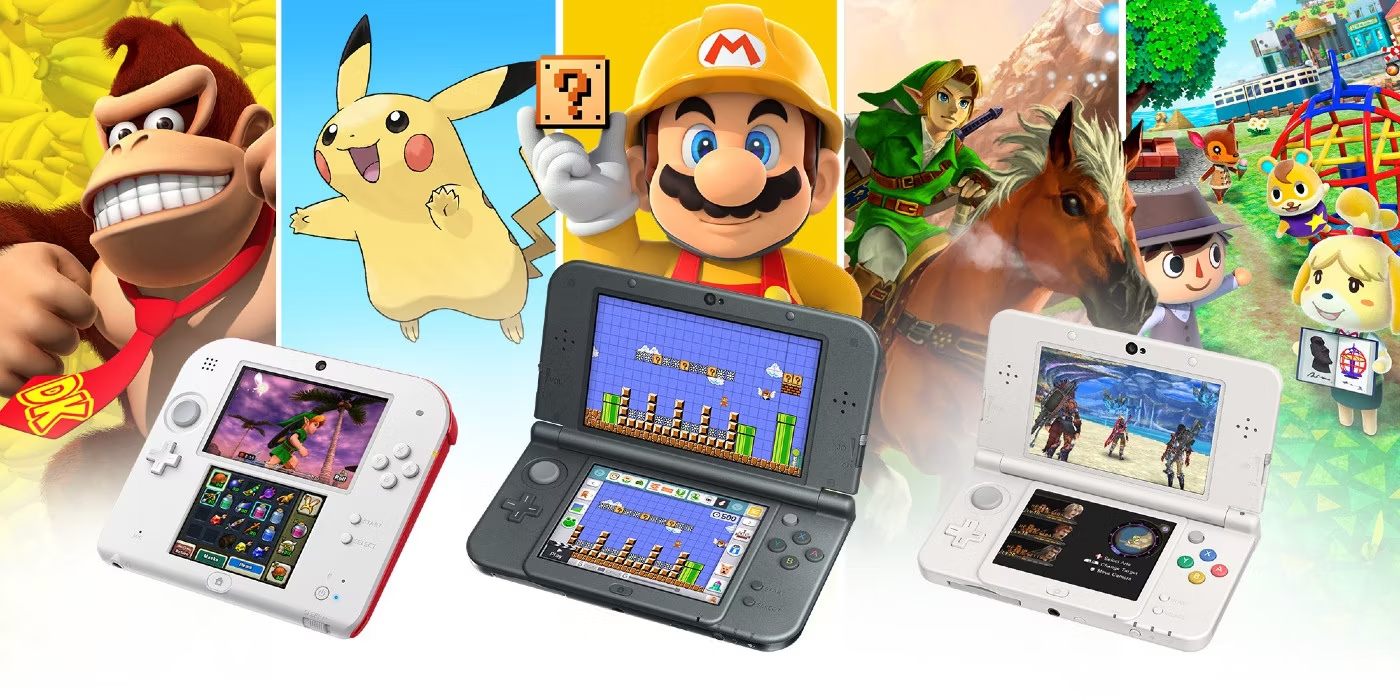
[Image link](https://static1.thegamerimages.com/wordpress/wp-content/uploads/2020/01/Nintendo-DS.jpg)

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
# <span style='color:#FF0000;'>Dataset Overview</span><br>
    
This dataset has been sourced from [vgchartz.com](https://www.vgchartz.com/). The data was scraped from numerous sources to compile a dataset of many video game titles for various video game consoles with global sales over 100,000. Video game titles span all the way from 1980 - 2020!
    
The columns that this dataset includes are:
    
- <b>Name</b> - The name of the video game titles.<br>
- <b>Platform</b> - The Console associated with the videogame title. (Example: Gamecube, PS1, PS2 etc.) <br>
- <b>Year</b> - The year the video game was released. <br>
- <b>Genre</b> - What type of category/genre the video game is.
- <b>Publisher</b> - Which company has published the video game.
- <b>NA_Sales</b> - How many sales were in the United States, in millions.
- <b>EU_Sales</b> - How many sales were in the Europe, in millions.
- <b>JP_Sales</b> - How many sales were in the Japan, in millions.
- <b>Other_Sales</b> - How many sales were in the other countries/regions, in millions.
- <b>Global_Sales</b> - Total sales across all regions, in millions.
   
    <b>Note</b>: This dataset only contains data up to 2020.

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style='color:#FF0000; font-size: 20px; font-weight: bold;'>Section 1: Read, Clean, and Learn about the Data</span><br>

In [273]:
#Import in standard libraries to help with the analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#Set 'df' as our dataframe variable, reading in the 'vgsales.csv' document.

df = pd.read_csv("vgsales.csv", encoding='latin-1')

In [4]:
#Check to make sure information loaded correctly and start to get familiar with our data.

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
#Call info() method to check for data types and potential null values. Null values spotted in 'Year' and 'Publisher'.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#Check for total amount of null values and in their respective categories.

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#Inspect the "Year" columns NaN values to determine how to handle them! This could be useful data, I will replace them.

df[df['Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [8]:
#Inspect the 'Publisher' columns NaN values. These could potentially serve useful for our EDA as well!

df[df['Publisher'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [9]:
#Create a copy of original dataset - just incase we need to reference.

df_copy = df.copy()

In [10]:
#Sanity check to make sure it worked properly.

df_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
#Fill in the 'Publisher' columns null values with "Unknown" string, in the "df_copy" dataframe.

df_copy['Publisher'].fillna("Unknown", inplace=True)

In [12]:
#Sanity check to examine that null values have filled in properly.

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
#Fill in "Year" columns null values with 0 int.

df_copy['Year'].fillna(0, inplace=True)

In [14]:
#Sanity check to see years were converted. Should convert all years to not be a float.

df_copy['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
0.0        271
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [15]:
#Make all years a int data type and not float.

df_copy['Year'] = df_copy['Year'].astype(int)

In [16]:
#Sanity check.

df_copy['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
0        271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [17]:
#Check to see if null values still exist in "df_copy" dataframe, and they don't!

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [473]:
#Clean up a few columnds data for clarity.
df_copy['Platform'] = df_copy['Platform'].replace("GB", "Gameboy")
df_copy['Platform'] = df_copy['Platform'].replace("GBA", "Gameboy Advance")
df_copy['Platform'] = df_copy['Platform'].replace("GC", "GameCube")
df_copy['Publisher'] = df_copy['Publisher'].replace("Warner Bros. Interactive Entertainment", "Warner Bros")

In [474]:
df_copy

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Gameboy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,Gameboy Advance,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GameCube,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [475]:
#Check unique publishers - there are many. This can help answer questions for Nintendo.

df_copy['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros', 'Universal Interactive',
       'Eidos Interactive', 'RedOctane', 'Vivendi Games',
       'Enix Corporation', 'Namco Bandai Games', 'Palcom',
       'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Unknown', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems',
       'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software',
       'ASCII Entertainment', 'Mindscape', '

In [476]:
#Check unique platforms. This also can help answer questions for Nintendo.

df_copy['Platform'].unique()

array(['Wii', 'NES', 'Gameboy', 'DS', 'X360', 'PS3', 'PS2', 'SNES',
       'Gameboy Advance', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600',
       'PSP', 'XOne', 'GameCube', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT',
       'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [477]:
#Check unique genre's. This can help us as well.

df_copy['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style='color:#FF0000; font-size: 20px; font-weight: bold;'>Section 2. Descriptive Questions to Learn More!</span><br>

In [478]:
#Global Mask Functions for helping with our analysis.

def MASK_GLOBAL_SALES(number=5):
    """Takes an int input and filters the dataframe based on global sales greater than the integer provided."""
    return df_copy[df_copy['Global_Sales'] > number]

def MASK_PUBLISHER(publisher):
    """Takes an input as a string and filters the dataframe based on a particular publisher"""
    return df_copy[df_copy['Publisher'] == publisher]

def MASK_NAME_TITLE(game_title):
    """
    Takes an input as a string and filters the dataframes 'Name' column to
    return any games that contain the string provided.
    """
    return df_copy[df_copy['Name'].str.contains(game_title)]

def MASK_PUBLISHER_GENRE(publisher, genre):
    """
    Filters the dataframe based on publisher and genre columns.
 
    Args:
        publisher (str): The first string.
        genre (str): The second string.
 
    Returns:
        Dataframe filtered for those coclumns
    """
    return df_copy[(df_copy['Publisher'] == publisher) & (df_copy['Genre'] == genre)]

def MASK_PUBLISHER_TWO(publisher):
    """Takes an input as a string and filters the dataframe so it does not include a particular publisher"""
    return df_copy[df_copy['Publisher'] != publisher]
                                                        
# MASK_PUBLISHER_TWO('Nintendo')[:100].groupby(['Publisher']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales",'Global_Sales']].sort_values('Global_Sales', ascending=False)

## 1. What are the top 10 games with the highest sales?

In [479]:
Top_Ten_Games = MASK_GLOBAL_SALES(15)[:10]
MASK_GLOBAL_SALES(15)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Gameboy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,Gameboy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


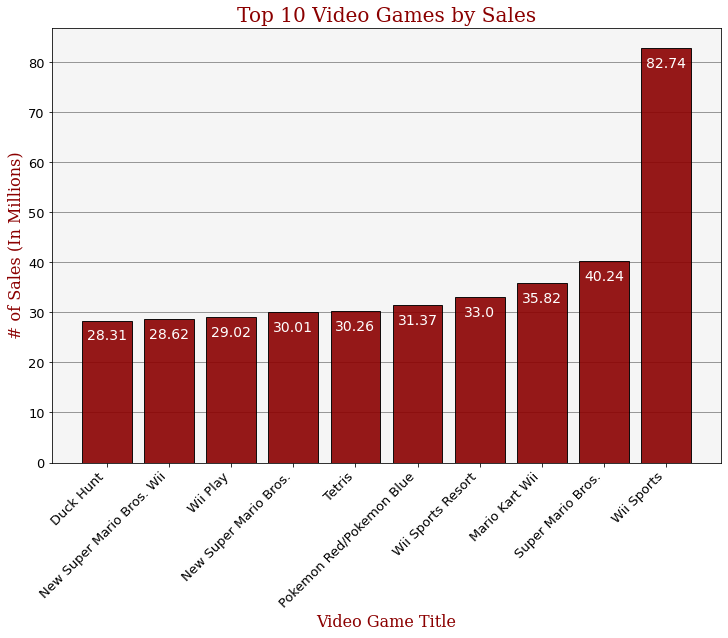

In [480]:
#Create label making function for labeling each bar in graph.
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] - 3, y[i], ha = 'center', va='center', color='white', fontsize=14)
        
        
#Custom Fonts
font1 = {'family':'serif','color':'darkred','size':20}
font2 = {'family':'serif','color':'darkred','size':16}


#Create the plot, add y axis gridlines, change background color.
fig, ax = plt.subplots(figsize=(12,8))
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('whitesmoke')


#Model data and set the name of the title, x, and y axis.
ax.bar(x=Top_Ten_Games['Name'], height=Top_Ten_Games['Global_Sales'],alpha=0.9, zorder=3, color='darkred', edgecolor='black')
ax.set_title("Top 10 Video Games by Sales", fontdict=font1)
ax.set_xlabel("Video Game Title", fontdict=font2, ha="center")
ax.set_ylabel("# of Sales (In Millions)", fontdict=font2, ha="center")


#Adjust the order of the x axis from least to most, rotate the x axis names by 45 degrees for viewing, change font size of x/y axis .
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
plt.gca().invert_xaxis()
addlabels(Top_Ten_Games['Name'], Top_Ten_Games['Global_Sales'])

plt.show()

## 2. Which Nintendo Platform has the highest video game sales?

In [481]:
Platform_Sales = MASK_PUBLISHER('Nintendo')
Total_Platform_Sales = Genre_Sales.groupby(['Platform'], as_index=False)['Global_Sales'].sum().sort_values('Global_Sales')

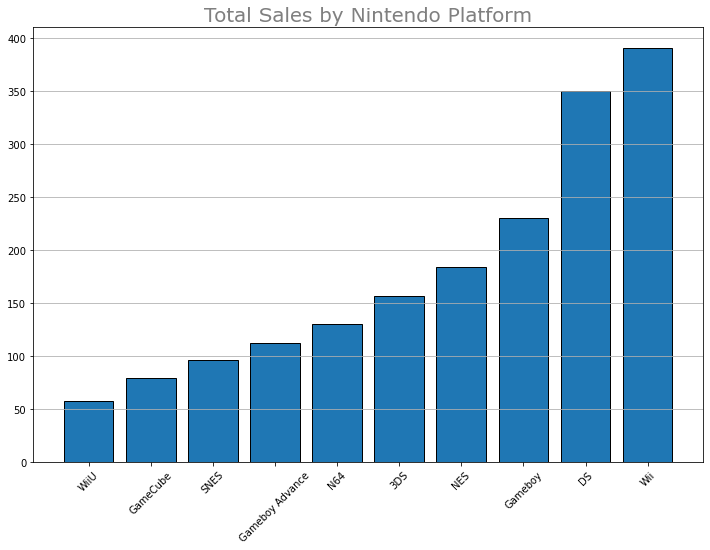

In [482]:
#Still need to style

#Create the plot
fig, ax = plt.subplots(figsize=(12,8))

#Custom Fonts
font1 = {'family':'verdana','color':'grey','size':20}
font2 = {'family':'verdana','color':'darkred','size':16}

ax.bar(x=Total_Platform_Sales['Platform'], height=Total_Platform_Sales['Global_Sales'], edgecolor='black')
ax.set_title("Total Sales by Nintendo Platform", fontdict=font1)
ax.grid(axis='y')
plt.xticks(rotation=45, ha='center')

plt.show()

## 3. Which region has the best performing sales for "Mario" titles?

In [483]:
Mario_Sales_by_Region = (MASK_NAME_TITLE("Mario")[:10])[["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
Mario_Sales_by_Region.set_index('Name', inplace=True)

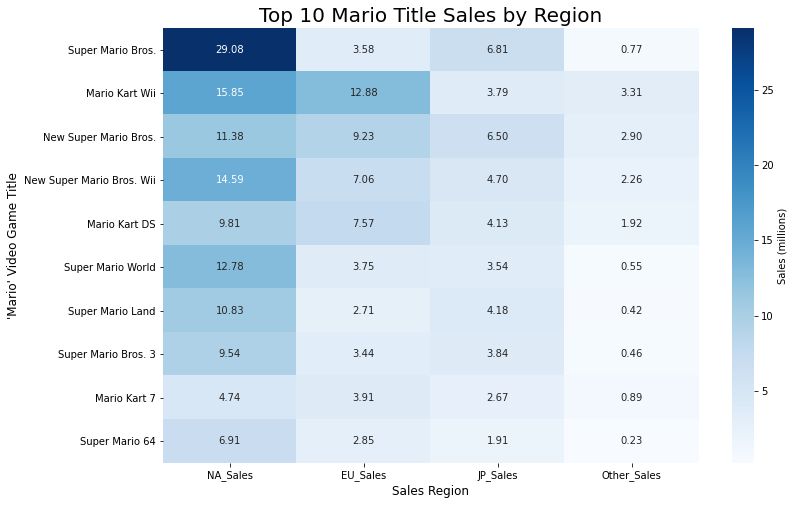

In [484]:
#Create the heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Mario_Sales_by_Region, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Sales (millions)'})

#Customize the axes
plt.title("Top 10 Mario Title Sales by Region", fontsize=20)
plt.xlabel("Sales Region", fontsize=12)
plt.ylabel("'Mario' Video Game Title", fontsize=12)
plt.show()

## 4. Which Genre has the highest sales for Nintendo?

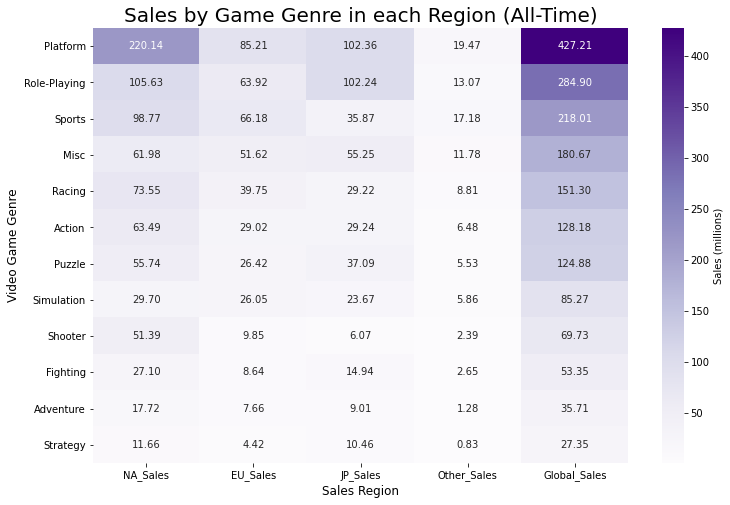

In [485]:
#Create the variable slicing for modeling the genre's and their sales.
Total_Genre_Sales = Genre_Sales.groupby(['Genre'], as_index=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales",'Global_Sales']].sum().sort_values('Global_Sales', ascending=False)

#Create the heatmap.
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Total_Genre_Sales, annot=True, cmap='Purples', fmt='.2f', cbar_kws={'label': 'Sales (millions)'})

#Customize the axes.
plt.title("Sales by Game Genre in each Region (All-Time)", fontsize=20)
plt.xlabel("Sales Region", fontsize=12)
plt.ylabel("Video Game Genre", fontsize=12)
plt.show()

## 5. Which competitors have high sales compared to Nintendo from 2015 - 2020?

In [486]:
Sales_By_Publisher_2015_And_Greater

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Atlus,0.00,0.00,0.34,0.00,0.34
3,Capcom,0.44,0.43,0.13,0.18,1.18
7,Microsoft Game Studios,0.60,0.48,0.15,0.10,1.32
11,Square Enix,0.24,0.33,0.66,0.11,1.33
5,Hello Games,0.58,0.74,0.02,0.26,1.60
6,Level 5,0.00,0.00,1.82,0.00,1.82
12,Take-Two Interactive,1.37,0.18,0.00,0.29,1.83
14,Warner Bros. Interactive Entertainment,0.74,0.87,0.00,0.24,1.84
2,Bethesda Softworks,0.88,0.89,0.02,0.28,2.07
0,Activision,1.38,1.11,0.14,0.38,3.01


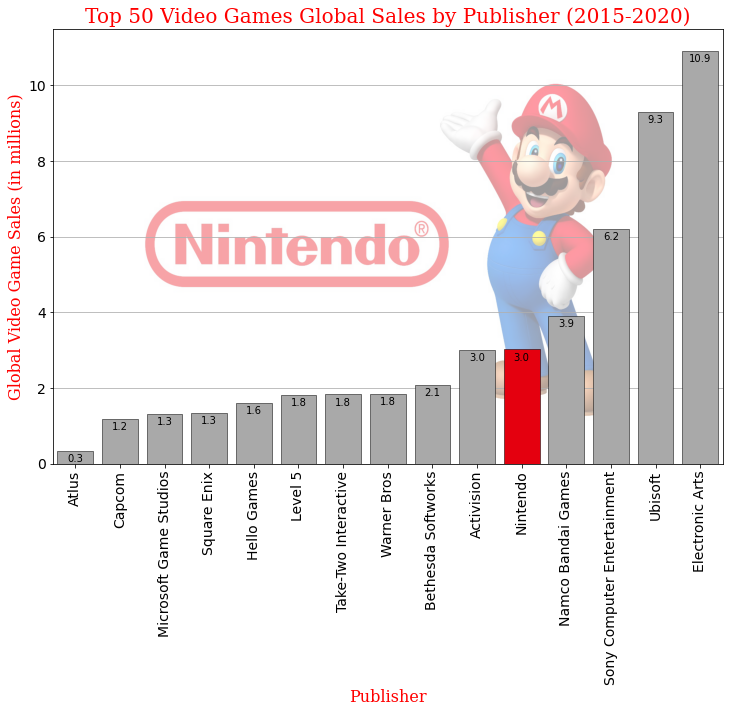

In [497]:
#Data sorting and setting up for plotting.
Greater_Than_2015 = df_copy[df_copy['Year'] > 2015]
Sales_By_Publisher_2015_And_Greater = Greater_Than_2015[:50].groupby(['Publisher'], as_index=False).sum()[['Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales",'Global_Sales']].sort_values('Global_Sales')

#Custom Fonts & Color Map for Bars in Graph.
font1 = {'family':'serif','color':'red','size':20}
font2 = {'family':'serif','color':'red','size':16}
color_mapping = ['darkgray' for _ in range(15)]
color_mapping[10] = ('#e4000f')

#Create the plot, set x & y axis titles, and graph title.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=Sales_By_Publisher_2015_And_Greater, x=Sales_By_Publisher_2015_And_Greater['Publisher'], height=Sales_By_Publisher_2015_And_Greater['Global_Sales'], zorder=3, color=color_mapping, edgecolor='black', linewidth=0.5)
ax.set_xlabel("Publisher", fontdict=font2)
ax.set_ylabel("Global Video Game Sales (in millions)",  fontdict=font2)
ax.set_title("Top 50 Video Games Global Sales by Publisher (2015-2020)", fontdict=font1)

#Plot Styling for axes ticks, background image. 
ax.invert_xaxis()
plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis='y')
background = plt.imread(r'C:\Users\Chris\Desktop\nintendo_logo.jpg')
ax.imshow(background, extent=[-0.5, 14.5, 0, 11.5], aspect='auto', alpha=0.4)

# Annotate each bar

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height - 0.08, 
        f'{height:.1f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=10)

plt.show()

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style='color:#FF0000; font-size: 20px; font-weight: bold;'>Section 3: Analysis & Recommendation</span><br>

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
Nintendo has been one of the best selling video game companies of all time dating back to 1985 with the super successful launch of the Nintendo Entertainment System and the Super Mario Bros Brand that remains immensely competitive to this day. It is clear from our data analysis that "Mario" branded video games is a dominant revenue stream for Nintendo, having 4 titles in the top 10 video games with best global sales. Subsequently, this was also indicated as most "Mario" branded video games are platformers, which our data visualization has shown that platformer genres are the best performing genre for every region in which we have data for in our dataset. 

The trend for Nintendo platforms appears that handheld consoles (I.E. Gameboy, Gameboy Advance, 3DS, etc.) have had video games with increasing sales as time goes on year over year when compared to traditional "at-home" platforms, such as the Gamecube and N64. This may suggest that the target market is moving towards mobile devices for their gaming experience as time continues.
    
Additionally, when looking at the top 50 global video game sales and comparing Nintendo's competitors, the marketplace is very competitive with competition such as the Playstation 4 and Xbox One which is pulling sales numbers and revenue away from Nintendo. Among the top 15 companies with video game sales ranging from 2015 - 2020, Nintendo ranks #5 of 15, which is very competitive. However, Nintendo is in a great position and I believe has opportunity to grow.
    
Nintendo

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style='color:#FF0000; font-size: 20px; font-weight: bold;'>Section 4: Appendix</span><br>

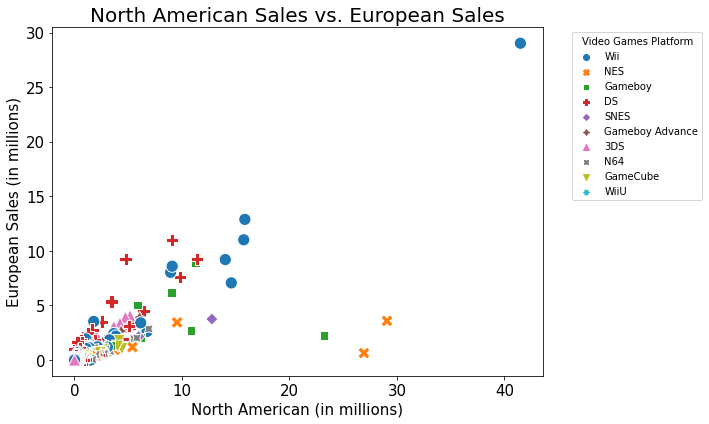

In [488]:
# Relationship analysis for Nintendo's sales by region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Genre_Sales, x='NA_Sales', y='EU_Sales', hue='Platform', style='Platform', s=150)
plt.title("North American Sales vs. European Sales", fontsize=20)
plt.xlabel('North American (in millions)', fontsize=15)
plt.ylabel('European Sales (in millions)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

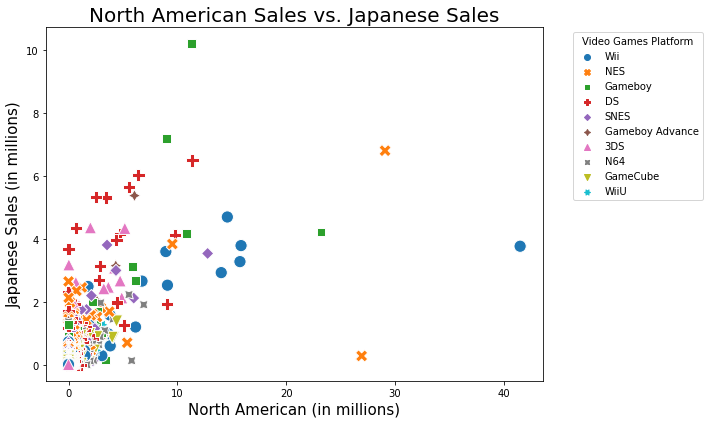

In [489]:
# Relationship analysis for Nintendo's sales by region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Genre_Sales, x='NA_Sales', y='JP_Sales', hue='Platform', style='Platform', s=150)
plt.title("North American Sales vs. Japanese Sales", fontsize=20)
plt.xlabel('North American (in millions)', fontsize=15)
plt.ylabel('Japanese Sales (in millions)', fontsize=15)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

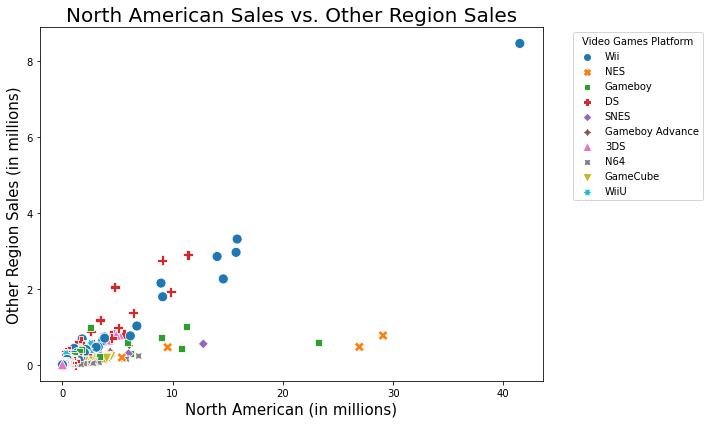

In [490]:
# Relationship analysis for Nintendo's sales by region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Genre_Sales, x='NA_Sales', y='Other_Sales', hue='Platform', style='Platform', s=100)
plt.title("North American Sales vs. Other Region Sales", fontsize=20)
plt.xlabel('North American (in millions)', fontsize=15)
plt.ylabel('Other Region Sales (in millions)', fontsize=15)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

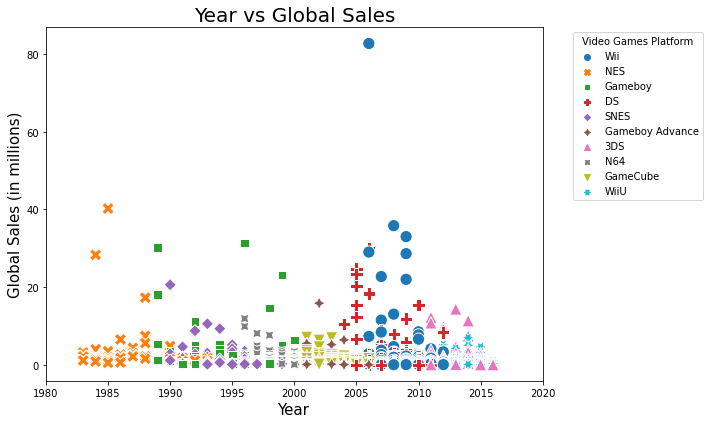

In [491]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Genre_Sales, x='Year', y='Global_Sales', hue='Platform', style='Platform', s=150)
plt.title("Year vs Global Sales", fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Global Sales (in millions)', fontsize=15)
plt.xlim(1980, 2020)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

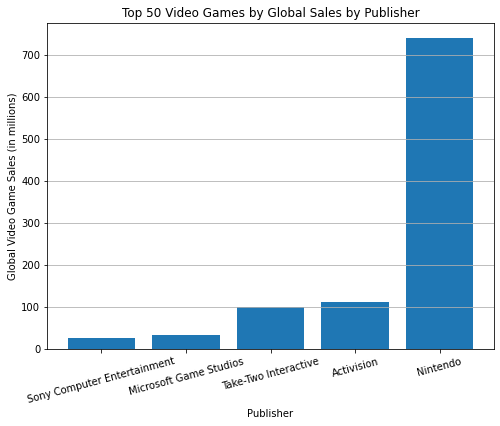

In [492]:
Sales_By_Publisher = df_copy[:50].groupby(['Publisher'], as_index=False).sum()[['Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales",'Global_Sales']].sort_values('Global_Sales')

#Custom Fonts
font1 = {'family':'serif','color':'darkred','size':20}
font2 = {'family':'serif','color':'darkred','size':16}

fig, ax = plt.subplots(figsize=(8,6))


ax.bar(data=Sales_By_Publisher, x=Sales_By_Publisher['Publisher'], height=Sales_By_Publisher['Global_Sales'])
ax.set_xlabel("Publisher")
ax.set_ylabel("Global Video Game Sales (in millions)")
ax.set_title("Top 50 Video Games by Global Sales by Publisher")

ax.grid(axis='y')
plt.xticks(rotation=15, ha='center')

plt.show()